# Node elevations and edge grades

  - [Overview of OSMnx](http://geoffboeing.com/2016/11/osmnx-python-street-networks/)
  - [GitHub repo](https://github.com/gboeing/osmnx)
  - [Examples, demos, tutorials](https://github.com/gboeing/osmnx/tree/master/examples)
  - [Documentation](https://osmnx.readthedocs.io/en/stable/)

You will need a Google Maps Elevation API key from https://developers.google.com/maps/documentation/elevation/start

API usage limits: 50 requests per second, 2500 free requests per day, and 512 locations per request. So that's 2500 * 512 = 1.28 million total locations theoretically possible per day. But, the request URL is limited to 8192 characters, so OSMnx rounds coordinates to 5 decimal places (approx 1 meter) to fit 350 locations in a batch (thus ~875,000 nodes are possible per day).
  
Note that there is some spatial inaccuracy given Google's dataset's resolution. For example, in San Francisco a couple of edges in parks have a 50+ percent grade because Google assigns one of their nodes the elevation of a hill adjacent to the street (here, the resolution is 19 meters).

In [1]:
from keys import google_elevation_api_key #replace this with your own API key
import osmnx as ox, numpy as np
ox.config(log_console=True, use_cache=True)

In [2]:
# get the street network for san francisco
place = 'San Francisco, California'
G = ox.graph_from_place(place, network_type='drive')

In [3]:
# add elevation to each of the nodes, using the google elevation API, then calculate edge grades
G = ox.add_node_elevations(G, api_key=google_elevation_api_key)
G = ox.add_edge_grades(G)

## Calculate some summary stats

In [4]:
edge_grades = [data['grade'] for u, v, k, data in G.edges(keys=True, data=True)]
avg_grade = np.mean(edge_grades)
med_grade = np.median(edge_grades)
print('Average street grade in {} is {:.1f}%'.format(place, avg_grade*100))
print('Median street grade in {} is {:.1f}%'.format(place, med_grade*100))

Average street grade in San Francisco, California is 4.2%
Median street grade in San Francisco, California is 2.8%


## Plot the nodes by elevation

Plot them colored from low (violet) to high (yellow).

In [5]:
# project the street network to UTM
G_proj = ox.project_graph(G)

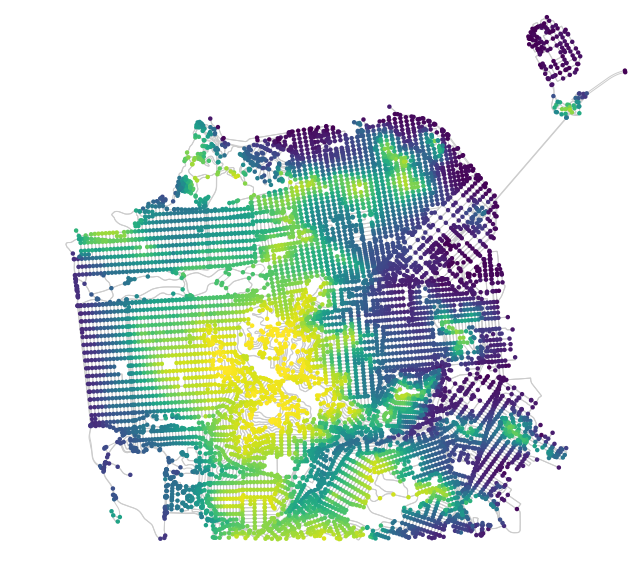

In [6]:
# get one color for each node, by elevation, then plot the network
nc = ox.get_node_colors_by_attr(G_proj, 'elevation')
fig, ax = ox.plot_graph(G_proj, fig_height=10, node_color=nc, node_size=20, node_zorder=2, edge_color='#cccccc')

## Plot the edges by grade

Grade is the ratio of elevation change to edge length. Plot edges colored from low/flat (violet) to high/steep (yellow).

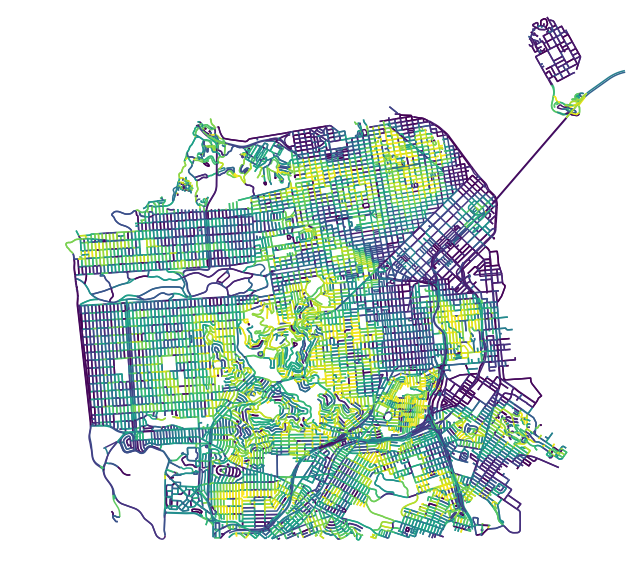

In [7]:
# get a color for each edge, by grade, then plot the network
ec = ox.get_edge_colors_by_attr(G_proj, 'grade', num_bins=100)
fig, ax = ox.plot_graph(G_proj, fig_height=10, edge_color=ec, edge_linewidth=1.5, node_size=0)